In [1]:
!pip install gym
!pip install PyOpenGL PyOpenGL_accelerate
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!pip -q install chainerrl
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

    100% |████████████████████████████████| 327kB 23.3MB/s 
  Running setup.py bdist_wheel for PyOpenGL-accelerate ... - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/4e/8e/aa/ae3f1309ede1048b7f6a11c92d3d7d50fd6a7ab4507e6c7aca
Successfully built PyOpenGL-accelerate


In [2]:
import gym
import numpy as np
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()
#env.render()
print('initial observation:', obs)

action = env.action_space.sample()
obs, r, done, info = env.step(action)
print('next observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)

observation space: Box(4,)
action space: Discrete(2)
initial observation: [-0.04866187  0.0424733  -0.0012066  -0.04353785]
next observation: [-0.04781241 -0.15263133 -0.00207736  0.24876414]
reward: 1.0
done: False
info: {}


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [0]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


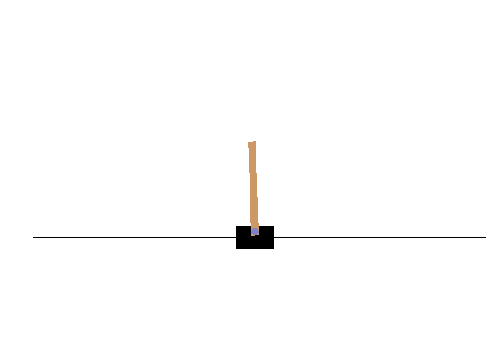

In [4]:
frames = []
env.reset()
for _ in range(100):
    frames.append(env.render(mode = 'rgb_array'))
    env.step(env.action_space.sample()) # take a random action

# for i in range(30):
#     obs = env.reset()
#     done = False
#     R = 0
#     t = 0
#     while not done and t < 200:
#         frames.append(env.render(mode = 'rgb_array'))
#         obs, r, done, _ = env.step(env.action_space.sample())
#         R += r
#         t += 1
#     print('test episode:', i, 'R:', R)
# env.render()

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())